# 2. Data Analysis
In this notebook we will use our extracted data and visualize it. For that purpose, we are importing function from our ```modules``` folder.

## 2.1 Libraries

We import the necessary libraries, including our own library in the modules file

In [1]:
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from scipy import stats
from functools import reduce

# Statsmodels
import statsmodels.api as sm
import pmdarima as pmd
from pmdarima.arima import auto_arima
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.api import VAR
from statsmodels.tools import add_constant
from statsmodels.tsa.vector_ar.var_model import VARResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    median_absolute_error,
    r2_score,
    precision_score

)

from xgboost import XGBRegressor

In [2]:
# We import our own functions
import sys
sys.path.append('../../..')  # Move two levels up to the project root
from modules.functions import *

## 2.2 Loading dataframe

In [3]:
df = pd.read_csv('../../../input/df_raw_core.csv', parse_dates=['Fecha'], index_col='Fecha')
df.head()

,Core CPI,Headline CPI,Terms of Trade - Exports,Terms of Trade - Imports,Chicken Placements (thousands),Private Credit - ME - Consumption (mill US$),Private Credit - MN - Consumption (mill S/),Private Credit - MN - Mortgage (mill S/),Capacity Utilization - Food & Beverages,Electricity Production - Lima (GWh),...,"Dependent Worker (3-month MA, thousands)","Unpaid Worker (3-month MA, thousands)","Firms 1-10 Workers (3-month MA, thousands)","Firms 11-50 Workers (3-month MA, thousands)","Firms 51+ Workers (3-month MA, thousands)","Adequately Employed (3-month MA, thousands)","Underemployed (3-month MA, thousands)",Employment Ratio (3-month MA),Monthly Income (3-month MA),"Unemployment Rate (3-month MA, %)"
Fecha,,,,,,,,,,,,,,,,,,,,,
2012-02-01,0.291447,0.293213,2.084305,0.415673,-0.070560,0.013861,0.012647,0.018248,-0.003850,0.046000,...,-0.015026,0.085068,0.014641,-0.061396,-0.006115,-0.000228,0.000940,-0.001258,0.001426,0.072148
2012-03-01,0.286284,0.281043,-1.918350,0.712507,0.117432,0.010176,0.012328,0.024442,0.030024,0.114160,...,0.000473,-0.077565,-0.017944,-0.006126,0.018381,0.020207,-0.044616,-0.007690,0.029640,0.041515
2012-04-01,0.281590,0.267810,-0.974725,0.043185,-0.060808,0.013539,0.008976,0.018552,-0.042243,-0.099706,...,0.006696,-0.095389,0.003692,-0.016509,0.009713,-0.024200,0.046237,0.001891,-0.016161,-0.069863
2012-05-01,0.277578,0.253922,-0.216514,-1.344951,0.063189,0.024991,0.019996,0.020493,0.048016,0.019639,...,0.007881,0.002999,0.003679,0.069158,-0.007347,-0.011218,0.033366,0.005487,-0.013942,-0.103756
2012-06-01,0.274706,0.240839,-6.245486,-1.499753,-0.007178,0.015136,0.015002,0.023488,-0.017617,0.025558,...,0.008321,0.014449,-0.000673,-0.005861,0.004731,-0.009531,0.014060,-0.001138,-0.000283,-0.129309


In [4]:
df_lags = pd.read_csv('../../../input/df_lags_core.csv', parse_dates=['Fecha'], index_col='Fecha')
df_lags.head()

,Core CPI,Headline CPI_lag_1,Headline CPI_lag_2,Headline CPI_lag_3,Terms of Trade - Exports_lag_1,Terms of Trade - Exports_lag_2,Terms of Trade - Exports_lag_3,Terms of Trade - Imports_lag_1,Terms of Trade - Imports_lag_2,Terms of Trade - Imports_lag_3,...,"Underemployed (3-month MA, thousands)_lag_3",Employment Ratio (3-month MA)_lag_1,Employment Ratio (3-month MA)_lag_2,Employment Ratio (3-month MA)_lag_3,Monthly Income (3-month MA)_lag_1,Monthly Income (3-month MA)_lag_2,Monthly Income (3-month MA)_lag_3,"Unemployment Rate (3-month MA, %)_lag_1","Unemployment Rate (3-month MA, %)_lag_2","Unemployment Rate (3-month MA, %)_lag_3"
Fecha,,,,,,,,,,,,,,,,,,,,,
2012-05-01,0.277578,0.267810,0.281043,0.293213,-0.974725,-1.918350,2.084305,0.043185,0.712507,0.415673,...,0.000940,0.001891,-0.007690,-0.001258,-0.016161,0.029640,0.001426,-0.069863,0.041515,0.072148
2012-06-01,0.274706,0.253922,0.267810,0.281043,-0.216514,-0.974725,-1.918350,-1.344951,0.043185,0.712507,...,-0.044616,0.005487,0.001891,-0.007690,-0.013942,-0.016161,0.029640,-0.103756,-0.069863,0.041515
2012-07-01,0.273140,0.240839,0.253922,0.267810,-6.245486,-0.216514,-0.974725,-1.499753,-1.344951,0.043185,...,0.046237,-0.001138,0.005487,0.001891,-0.000283,-0.013942,-0.016161,-0.129309,-0.103756,-0.069863
2012-08-01,0.272904,0.228916,0.240839,0.253922,1.205823,-6.245486,-0.216514,-0.280199,-1.499753,-1.344951,...,0.033366,0.009489,-0.001138,0.005487,0.010094,-0.000283,-0.013942,-0.012374,-0.129309,-0.103756
2012-09-01,0.273803,0.220084,0.228916,0.240839,0.609882,1.205823,-6.245486,1.374188,-0.280199,-1.499753,...,0.014060,-0.009759,0.009489,-0.001138,0.025027,0.010094,-0.000283,0.073002,-0.012374,-0.129309


## 2.3 Analyse our data

We do a quick inspect in our data 

In [8]:
# Define the range of lags to test
lags_range = range(1, 21)  # Example range; you can adjust based on your needs

# Initialize lists to store results
aic_values = []
bic_values = []
lag_values = []

# Loop through different lags and compute AIC/BIC for the VAR model
for lags in lags_range:
    try:
        # Fit the VAR model
        model = VAR(df)
        result = model.fit(lags)
        
        # Store the AIC and BIC values
        aic_values.append(result.aic)
        bic_values.append(result.bic)
        lag_values.append(lags)
    except np.linalg.LinAlgError:
        print(f"Lag order {lags} resulted in a LinAlgError.")
    except ValueError as e:
        print(f"Lag order {lags} resulted in a ValueError: {e}")

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'lags': lag_values,
    'AIC': aic_values,
    'BIC': bic_values
})

# Find the optimal number of lags
best_aic_lags = results_df.loc[results_df['AIC'].idxmin(), 'lags']
best_bic_lags = results_df.loc[results_df['BIC'].idxmin(), 'lags']

print(f'Optimal number of lags (AIC): {best_aic_lags}')
print(f'Optimal number of lags (BIC): {best_bic_lags}')


Lag order 2 resulted in a LinAlgError.
Optimal number of lags (AIC): 3
Optimal number of lags (BIC): 3


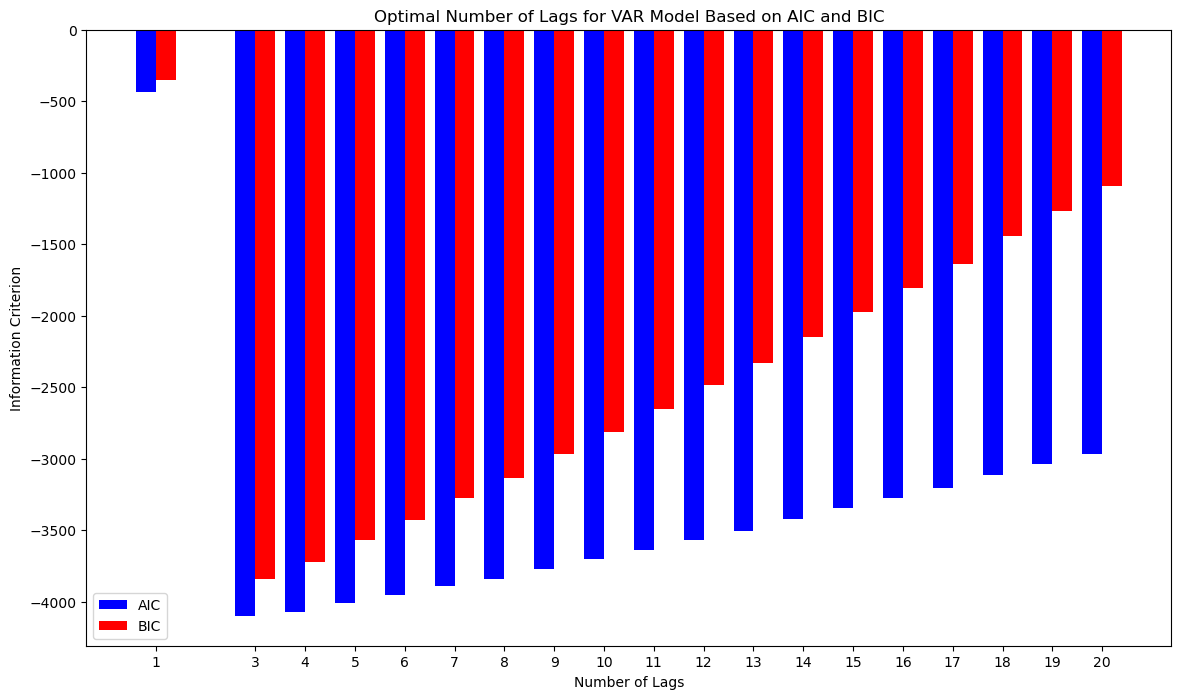

In [9]:
plt.figure(figsize=(14, 8))
plt.bar(results_df['lags'] - 0.2, results_df['AIC'], width=0.4, align='center', label='AIC', color='b')
plt.bar(results_df['lags'] + 0.2, results_df['BIC'], width=0.4, align='center', label='BIC', color='r')
plt.xlabel('Number of Lags')
plt.ylabel('Information Criterion')
plt.title('Optimal Number of Lags for VAR Model Based on AIC and BIC')
plt.legend()
plt.xticks(results_df['lags'])
plt.show()